In [89]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import requests
import os
from scipy.stats import linregress
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [65]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [66]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [67]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

590

In [68]:
city_data = []
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
  
# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(69)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
        
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to the record count
    record_count += 1
        
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | bata
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | agadez
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | chingirlau
Processing Record 12 of Set 1 | morant bay
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | sorland
Processing Record 16 of Set 1 | ketchikan
Processing Record 17 of Set 1 | geraldton
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | foumbot
Processing Record 21 of Set 1 | saleaula
City not found. Skipping...
Processing Record 22 of Set

Processing Record 36 of Set 4 | taoudenni
Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | iqaluit
Processing Record 39 of Set 4 | tinaquillo
Processing Record 40 of Set 4 | sept-iles
Processing Record 41 of Set 4 | rungata
City not found. Skipping...
Processing Record 42 of Set 4 | baykit
Processing Record 43 of Set 4 | pimentel
Processing Record 44 of Set 4 | piet retief
Processing Record 45 of Set 4 | china
Processing Record 46 of Set 4 | makat
Processing Record 47 of Set 4 | balabag
Processing Record 48 of Set 4 | ormara
Processing Record 49 of Set 4 | moldovenesti
Processing Record 50 of Set 4 | christchurch
Processing Record 1 of Set 5 | isangel
Processing Record 2 of Set 5 | zemio
Processing Record 3 of Set 5 | kamenka
Processing Record 4 of Set 5 | sampit
Processing Record 5 of Set 5 | jinchang
Processing Record 6 of Set 5 | muzhi
Processing Record 7 of Set 5 | lieksa
Processing Record 8 of Set 5 | caravelas
Processing Reco

Processing Record 23 of Set 8 | port antonio
Processing Record 24 of Set 8 | san pedro
Processing Record 25 of Set 8 | shache
Processing Record 26 of Set 8 | labuhan
Processing Record 27 of Set 8 | machali
Processing Record 28 of Set 8 | saravan
Processing Record 29 of Set 8 | araouane
Processing Record 30 of Set 8 | ramanuj ganj
Processing Record 31 of Set 8 | tortoli
Processing Record 32 of Set 8 | strelka
Processing Record 33 of Set 8 | yueyang
Processing Record 34 of Set 8 | muroto
Processing Record 35 of Set 8 | tupelo
Processing Record 36 of Set 8 | maceio
Processing Record 37 of Set 8 | funadhoo
Processing Record 38 of Set 8 | sahrak
City not found. Skipping...
Processing Record 39 of Set 8 | baghdad
Processing Record 40 of Set 8 | lardos
Processing Record 41 of Set 8 | port-cartier
Processing Record 42 of Set 8 | xuddur
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | fort frances
Processing Record 45 of Set 8 | opuwo
Processing Record 46 of Set 8 | high le

Processing Record 9 of Set 12 | half moon bay
Processing Record 10 of Set 12 | marsh harbour
Processing Record 11 of Set 12 | palkino
Processing Record 12 of Set 12 | evensk
Processing Record 13 of Set 12 | mangrol
Processing Record 14 of Set 12 | dromolaxia
Processing Record 15 of Set 12 | deputatskiy
Processing Record 16 of Set 12 | erzin
Processing Record 17 of Set 12 | isabela
Processing Record 18 of Set 12 | kurilsk
Processing Record 19 of Set 12 | makakilo city
Processing Record 20 of Set 12 | lokachi
Processing Record 21 of Set 12 | sombrio
Processing Record 22 of Set 12 | achisay
City not found. Skipping...
Processing Record 23 of Set 12 | phan thiet
Processing Record 24 of Set 12 | mersing
Processing Record 25 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 26 of Set 12 | nova granada
Processing Record 27 of Set 12 | gawler
Processing Record 28 of Set 12 | rocky mountain house
Processing Record 29 of Set 12 | keningau
Processing Record 30 of Set 12 | murmashi

In [70]:
len(city_data)

535

In [73]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,ZA,2022-04-03 15:24:58,-34.5322,20.0403,67.44,70,71,12.82
1,Castro,BR,2022-04-03 15:21:47,-24.7911,-50.0119,66.09,85,100,9.24
2,Butaritari,KI,2022-04-03 15:24:59,3.0707,172.7902,81.21,71,65,14.83
3,Hobart,AU,2022-04-03 15:24:59,-42.8794,147.3294,57.06,93,100,4.61
4,Upernavik,GL,2022-04-03 15:24:59,72.7868,-56.1549,16.61,81,79,8.81


In [75]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data","cities.csv")
city_data_df.to_csv(output_data_file, index_label="city_ID")

In [77]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

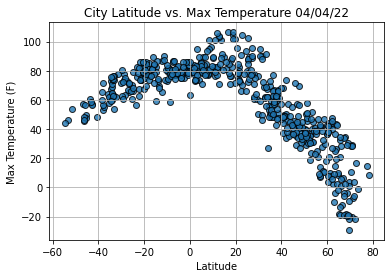

In [85]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label=cities)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

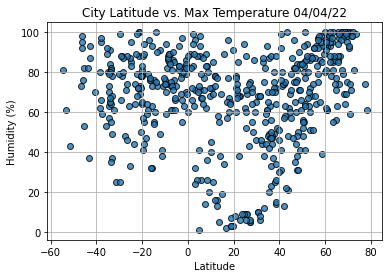

In [86]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label=cities)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

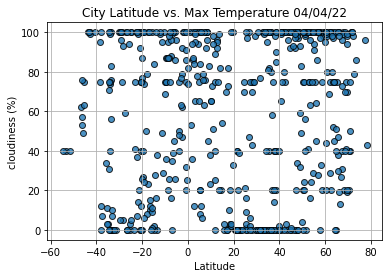

In [87]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label=cities)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

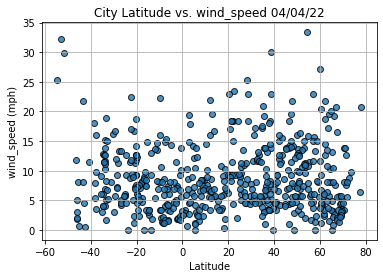

In [88]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
           wind_speed,
           edgecolor="black",
           linewidth=1,
           marker="o",
           alpha=0.8,
           label=cities)

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed " + time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [105]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    
     # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [106]:
index13 = city_data_df.loc[13]
index13

City                        Bluff
Country                        NZ
Date          2022-04-03 15:25:03
Lat                         -46.6
Lng                      168.3333
Max Temp                    56.95
Humidity                       73
Cloudiness                     62
Wind Speed                  11.79
Name: 13, dtype: object

In [107]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

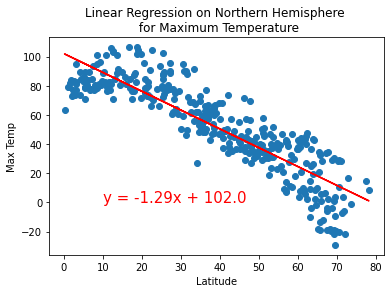

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,0))

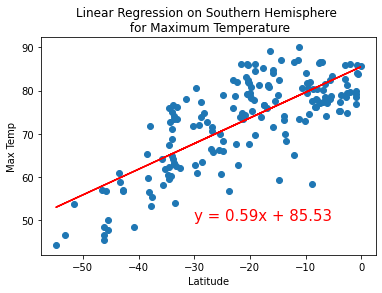

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on Southern Hemisphere \n for Maximum Temperature', "Max Temp",(-30,50))

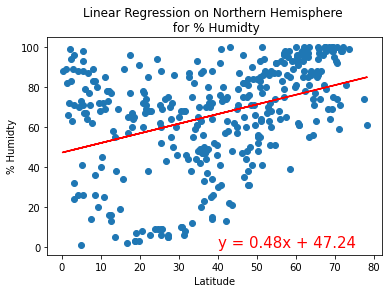

In [120]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere \n for % Humidty", "% Humidty",(40,0))

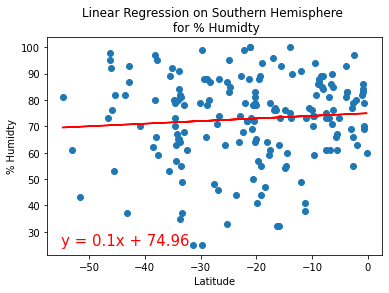

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere \n for % Humidty", "% Humidty",(-55,25))

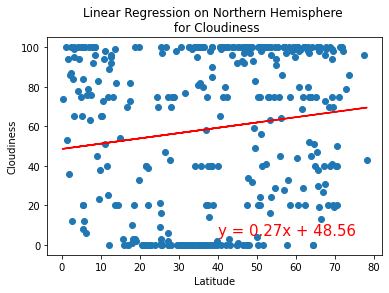

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere \n for Cloudiness", "Cloudiness",(40,5))

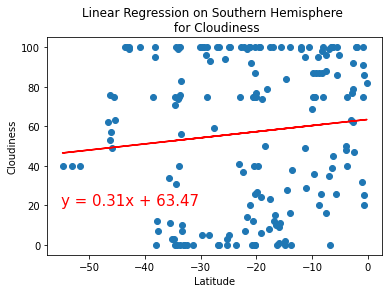

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere \n for Cloudiness", "Cloudiness",(-55,20))

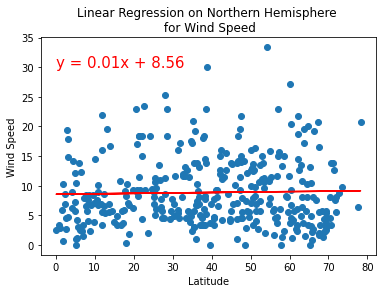

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Northern Hemisphere \n for Wind Speed", "Wind Speed",(0,30))

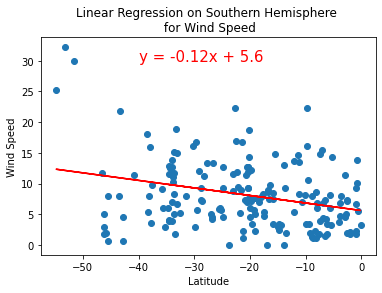

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function
plot_linear_regression(x_values, y_values, 
                       "Linear Regression on Southern Hemisphere \n for Wind Speed", "Wind Speed",(-40,30))